In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv
cars = pd.read_csv("MY2023_Fuel_Consumption_Ratings.csv")

In [3]:
cars.head()

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [4]:
# List columns
cars.columns.to_list()

['Model Year',
 'Make',
 'Model',
 'Vehicle Class',
 'Engine Size (L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions (g/km)',
 'CO2 Rating',
 'Smog Rating']

In [5]:
# Drop unwanted, this one only can be execute 1x
cars.drop(columns=[
    'Model Year',
    'Transmission',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)'
], inplace=True)

In [6]:
# Print unique classes
print(cars["Vehicle Class"].unique())

['Full-size' 'SUV: Small' 'SUV: Standard' 'Compact' 'Mid-size'
 'Minicompact' 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Pickup truck: Small' 'Pickup truck: Standard'
 'Minivan' 'Special purpose vehicle']


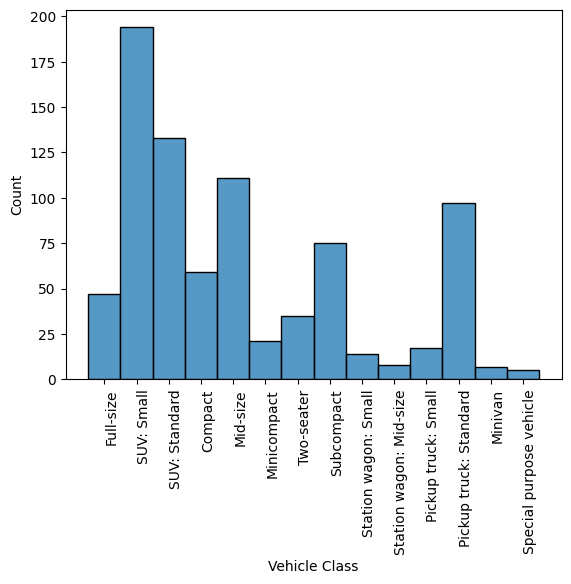

In [7]:
# Histogram
fig, ax = plt.subplots()
sns.histplot(data=cars, x="Vehicle Class")
# sns.histplot(data=cars, x="CO2 Rating", binwidth=1)
# Rotate ticks
plt.xticks(rotation=90, ha="right", rotation_mode="anchor")
plt.show()

## Play with `binwidth` here to show how it can affect it

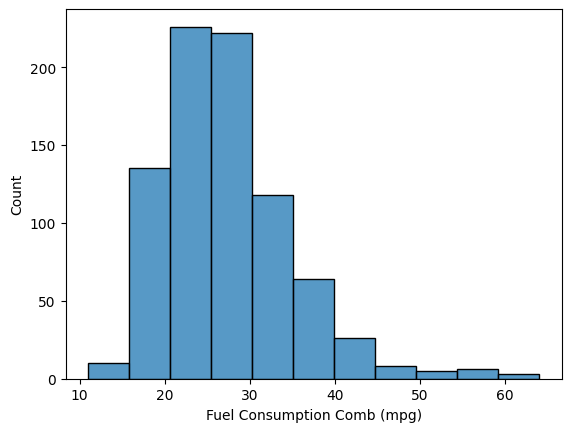

In [8]:
# Default histogram
sns.histplot(data=cars, x="Fuel Consumption Comb (mpg)", binwidth=5)
plt.show()

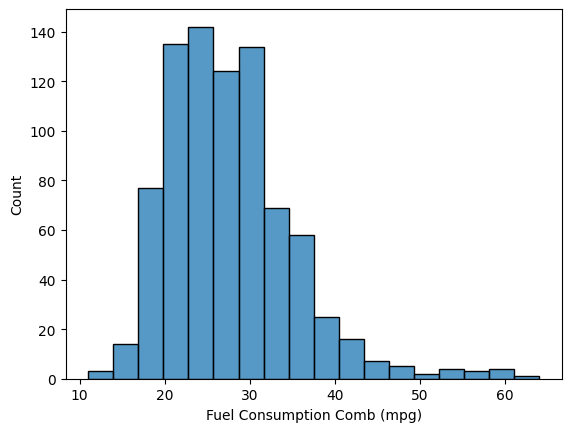

In [9]:
# Changing bin sizes can change how the data look
sns.histplot(data=cars, x="Fuel Consumption Comb (mpg)", binwidth=3)
plt.show()

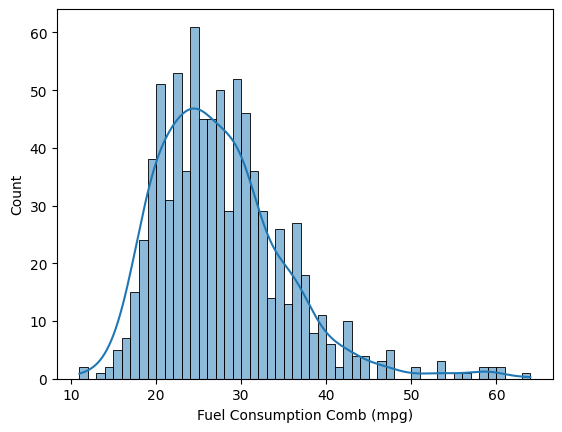

In [10]:
# Can use kernel density estimate, which treats each point as tiny Gaussian
sns.histplot(data=cars, x="Fuel Consumption Comb (mpg)", binwidth=1, kde=True)
plt.show()

## More histograms is hard to see, so maybe use KDE

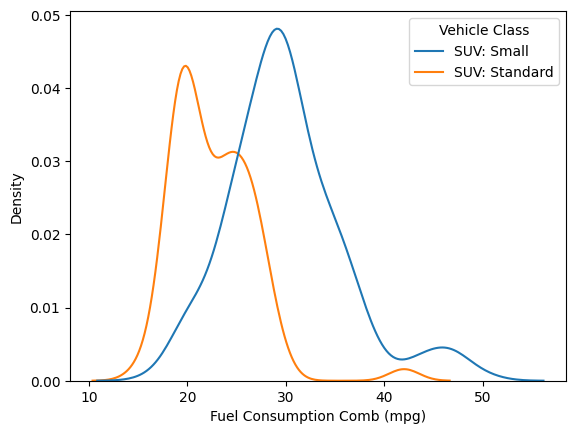

In [11]:
# Get SUVs
subset = cars[cars["Vehicle Class"].str.contains("SUV")]

# Plot KDE without histogram. Hue argument displays each unique in that column separately
sns.kdeplot(data=subset, x="Fuel Consumption Comb (mpg)", hue="Vehicle Class")
plt.show()

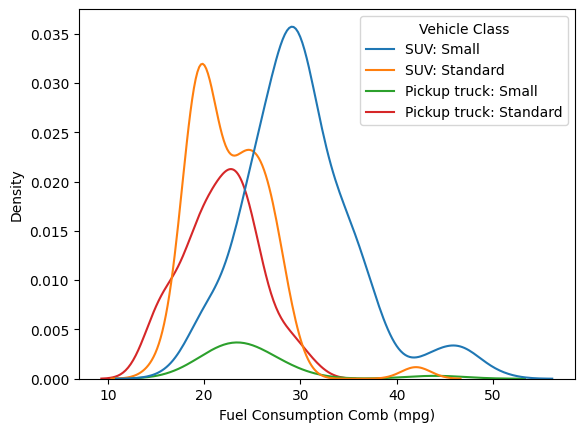

In [12]:
# Add trucks
subset = cars[(cars["Vehicle Class"].str.contains("SUV")) | (cars["Vehicle Class"].str.contains("Pickup"))]

# Now it shows 4 instead of 2
sns.kdeplot(data=subset, x="Fuel Consumption Comb (mpg)", hue="Vehicle Class")
plt.show()

<Axes: xlabel='Cylinders', ylabel='Fuel Consumption Comb (mpg)'>

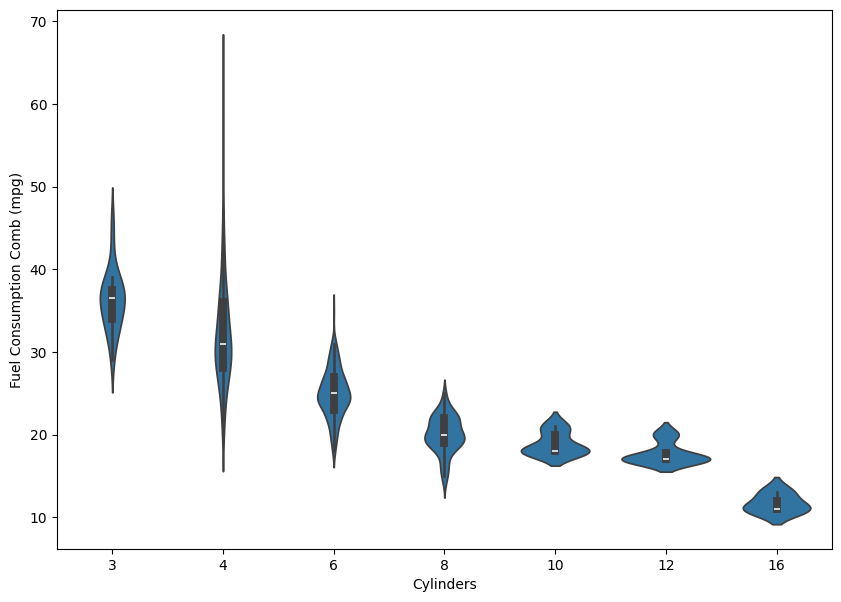

In [13]:
# Violin plot shows distributions across categorical variable
plt.figure(figsize=(10,7))
sns.violinplot(data=cars, x="Cylinders", y="Fuel Consumption Comb (mpg)")

## Scatters

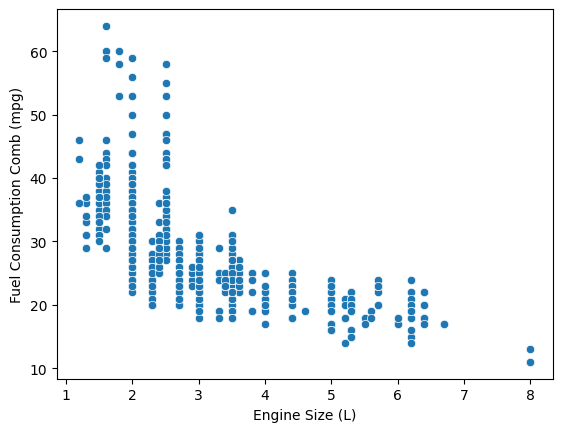

In [14]:
# Scatter
sns.scatterplot(data=cars, x="Engine Size (L)", y="Fuel Consumption Comb (mpg)")
plt.show()

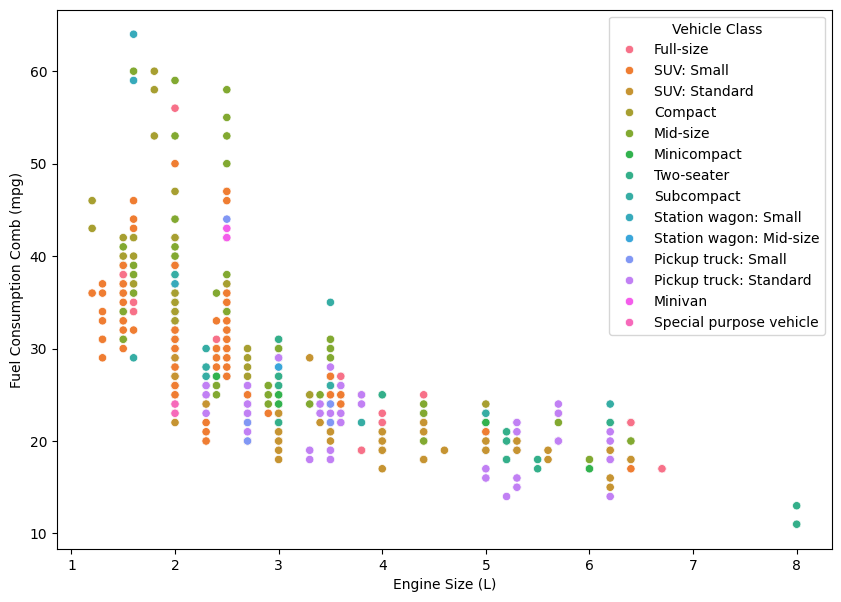

In [15]:
# Scatter with hue
plt.figure(figsize=(10,7))
sns.scatterplot(data=cars, x="Engine Size (L)", y="Fuel Consumption Comb (mpg)", hue="Vehicle Class")
plt.show()

# STOPPED HERE

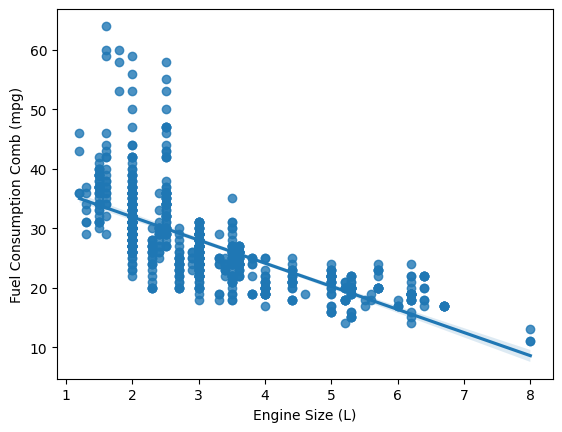

In [16]:
# Add trendline
sns.regplot(data=cars, x="Engine Size (L)", y="Fuel Consumption Comb (mpg)")
plt.show()

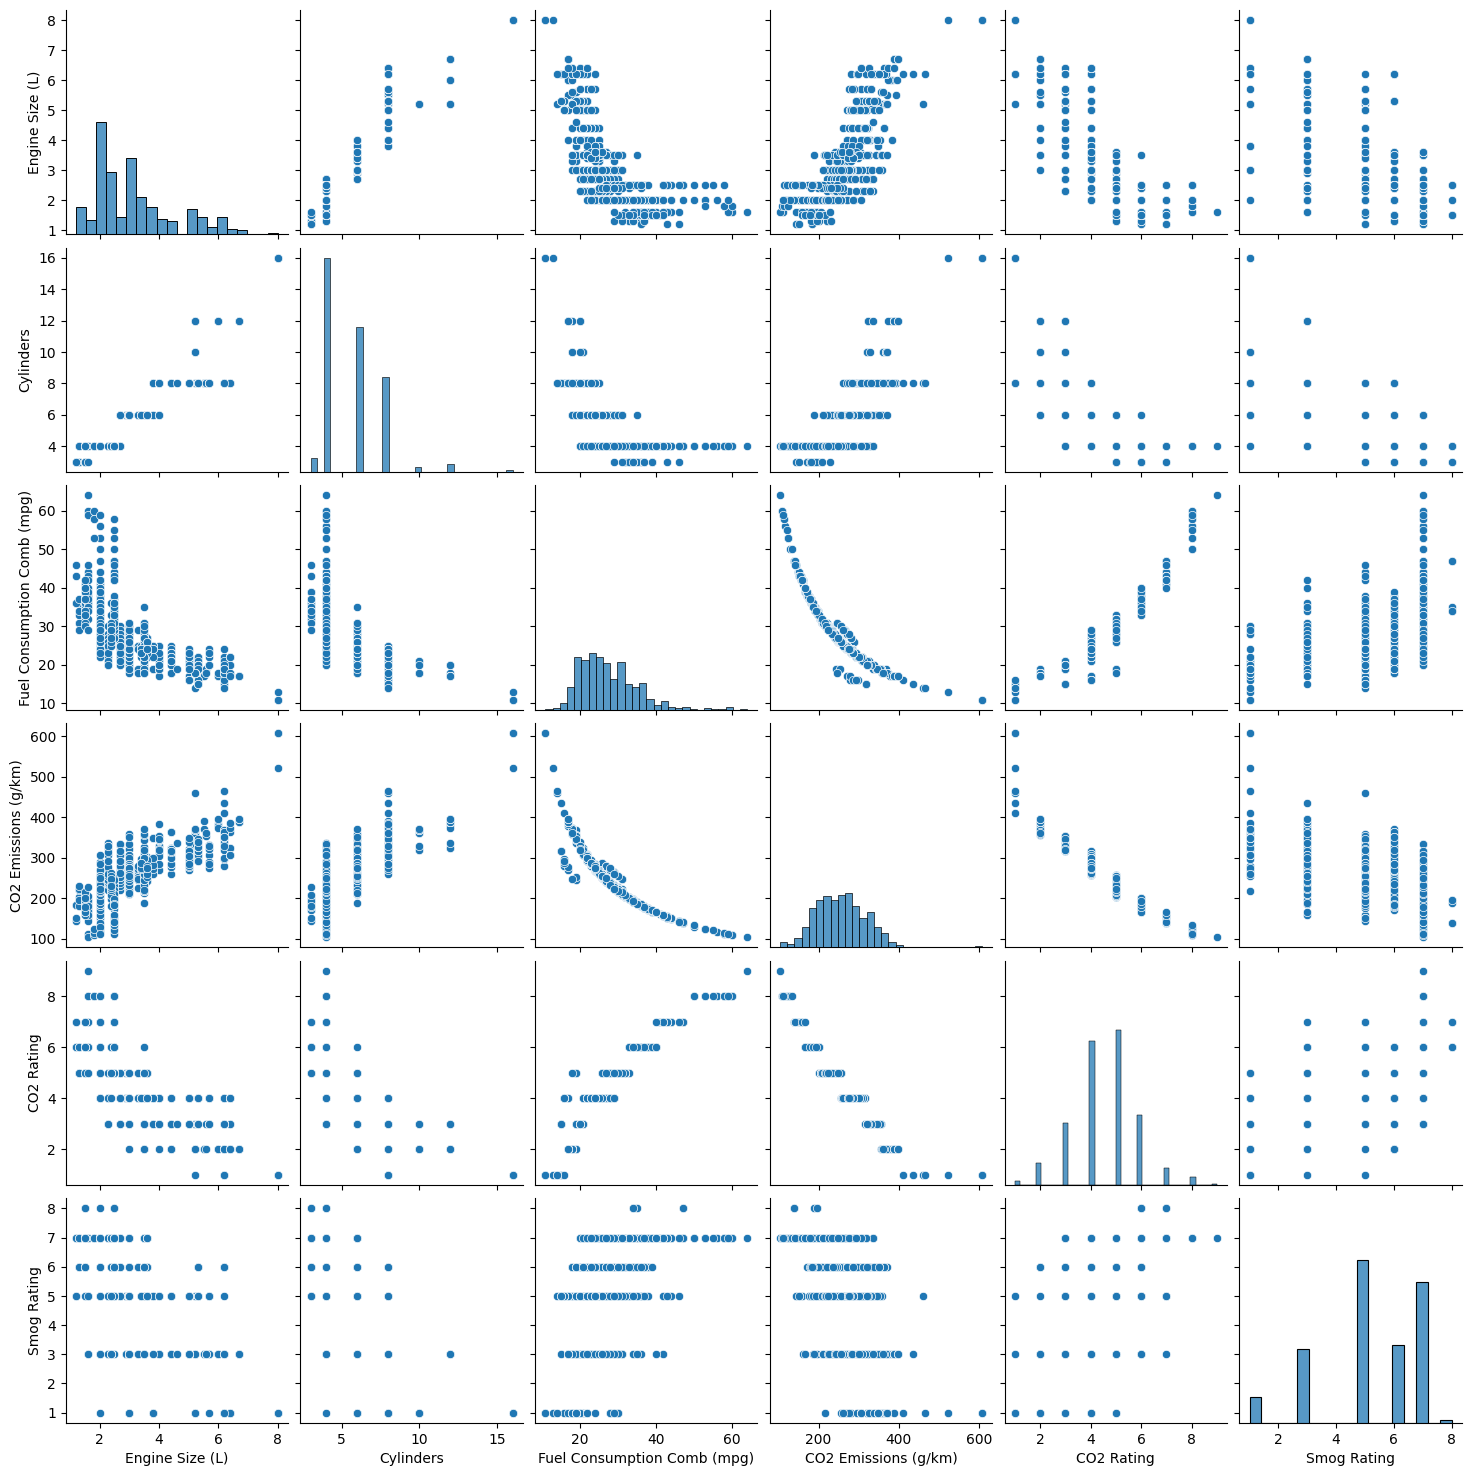

In [17]:
# Compare all the columns against each other for trends at a glance
sns.pairplot(data=cars)
plt.show()

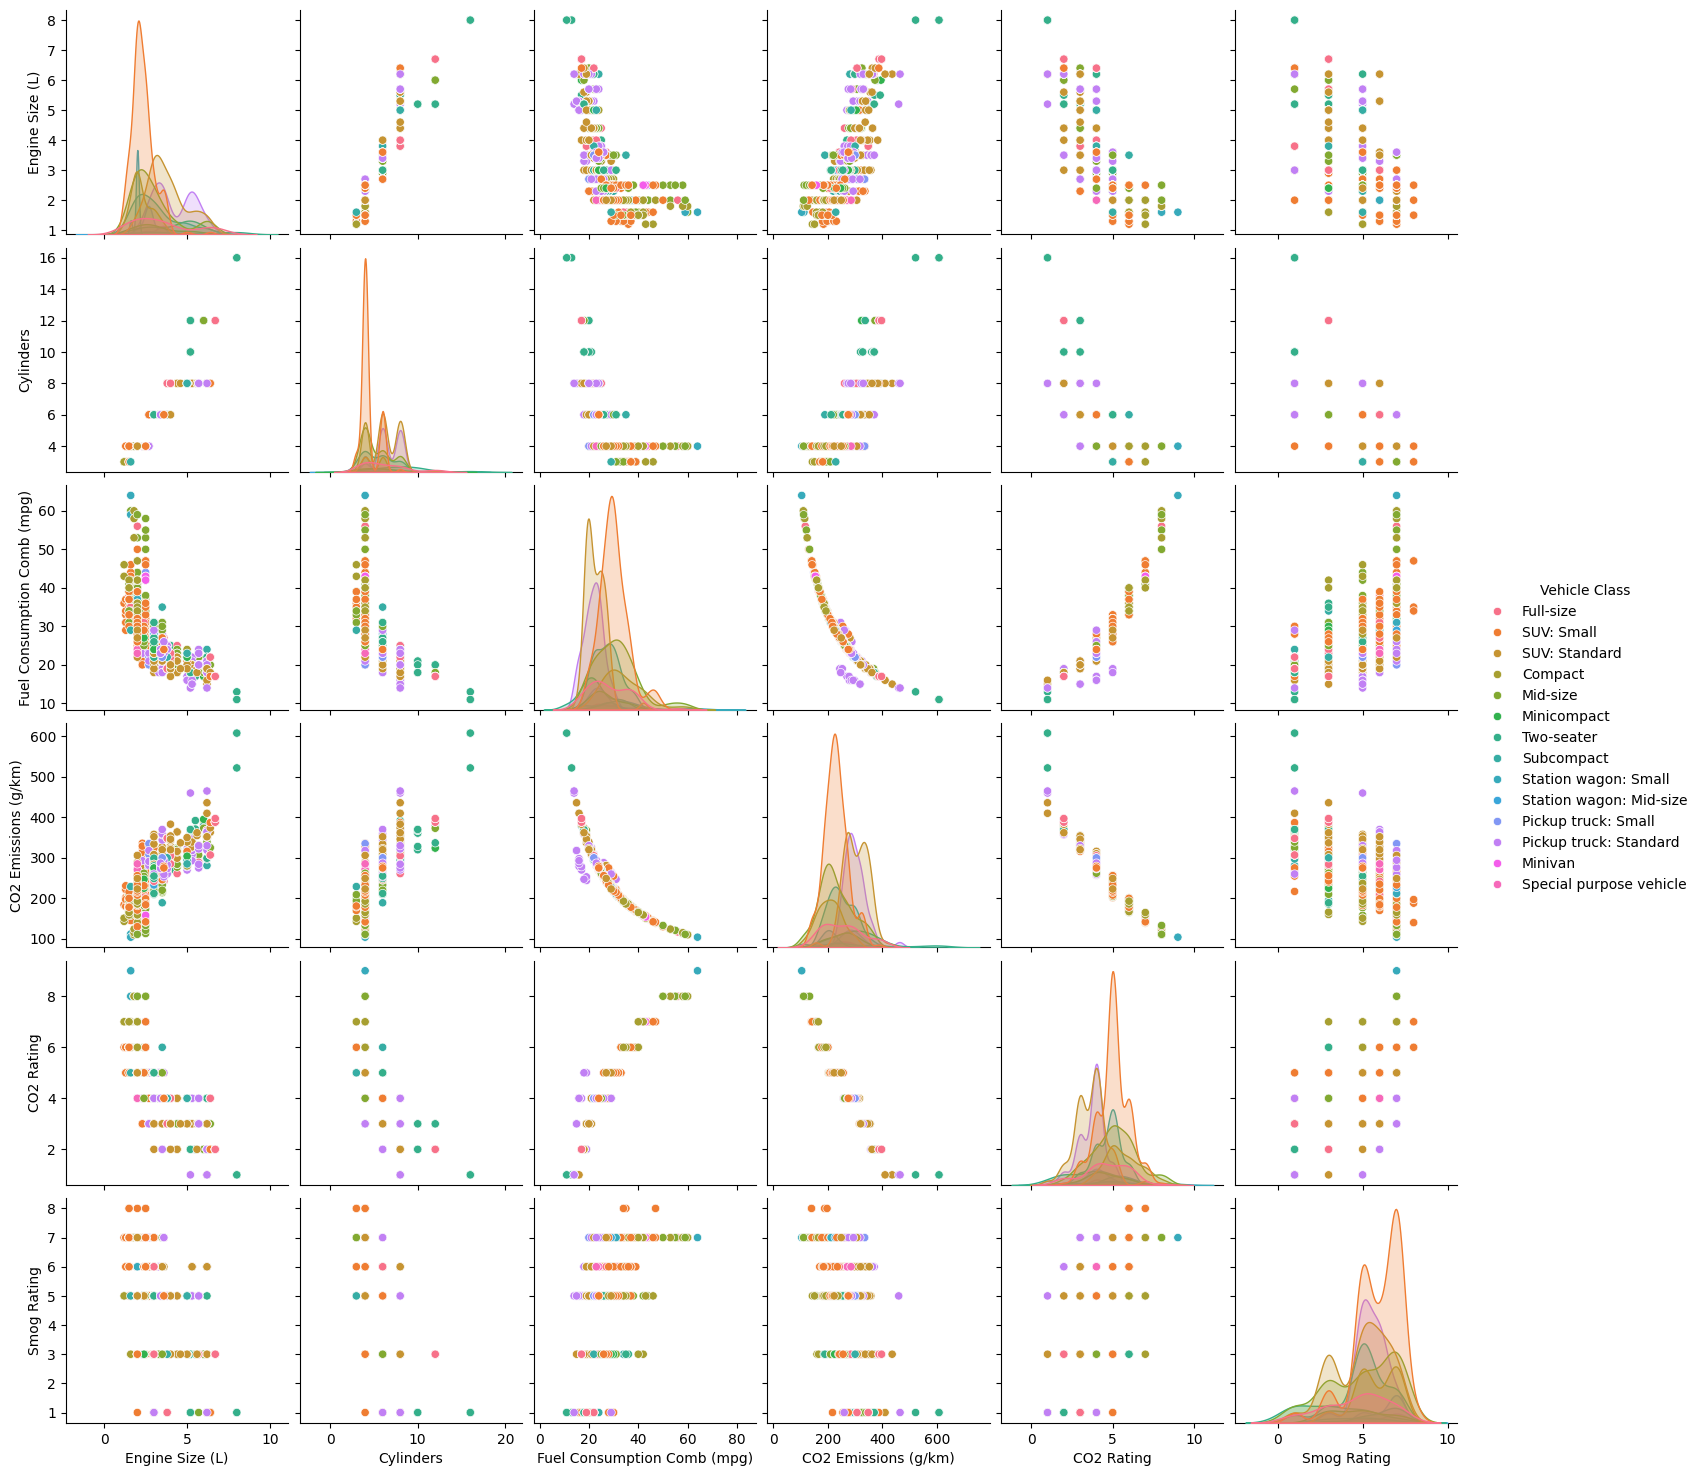

In [18]:
# Add hue separation
sns.pairplot(data=cars, hue="Vehicle Class")
plt.show()

In [ ]:
# Aggregate means using groupby
#v_classes = cars.groupby(by="Vehicle Class").mean()
#v_classes = cars["Vehicle Class"].unique()
v_classes = cars.mean()
v_classes
#v_classes = v_classes.sort_values(by="Fuel Consumption Comb (mpg)")
#v_classes

TypeError: agg function failed [how->mean,dtype->object]

In [21]:
# Bar chart
sns.barplot(data=v_classes, x=v_classes.index, y="Fuel Consumption Comb (mpg)")
plt.xticks(rotation=70, ha="right", rotation_mode="anchor")
plt.show()

NameError: name 'v_classes' is not defined

In [ ]:
# Load usda
usda = pd.read_csv("usda_farm_indices.csv")
usda.head(10)

In [ ]:
# Line plots
sns.lineplot(data=usda[usda["Attribute"].str.contains("Total")], x="Year", y="Value", hue="Attribute")

In [ ]:
# One liner to make pivot table from other lesson
usda_pivot = usda[usda["Attribute"].str.contains("Total")].pivot(index="Year", columns="Attribute", values="Value")
usda_pivot.head()

In [ ]:
# Trends
sns.pairplot(data=usda_pivot)

In [ ]:
# Correlations
usda_corr = usda_pivot.corr()
usda_corr

In [ ]:
# Heatmap of correlations
sns.heatmap(usda_corr, cmap="vlag")
plt.show()